In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [58]:
data = pd.read_csv("dataset_dates.csv")
data

,Bed Rooms,Bath Rooms,Living Rooms,Kitchen,Squre (Feet),Labors,Time (Date)
0,1,1,1,1,700,6,3
1,1,1,1,1,700,5,4
2,1,1,1,1,700,4,6
3,1,1,1,1,700,3,7
4,1,1,1,1,700,2,9
...,...,...,...,...,...,...,...
190,4,2,1,1,1500,6,12
191,4,2,1,1,1500,5,13
192,4,2,1,1,1500,4,14
193,4,2,1,1,1500,3,16


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Bed Rooms     195 non-null    int64
 1   Bath Rooms    195 non-null    int64
 2   Living Rooms  195 non-null    int64
 3   Kitchen       195 non-null    int64
 4   Squre (Feet)  195 non-null    int64
 5   Labors        195 non-null    int64
 6   Time (Date)   195 non-null    int64
dtypes: int64(7)
memory usage: 10.8 KB


In [60]:
data.corr()['Time (Date)']

Bed Rooms       0.508742
Bath Rooms      0.218677
Living Rooms         NaN
Kitchen              NaN
Squre (Feet)    0.689055
Labors         -0.678011
Time (Date)     1.000000
Name: Time (Date), dtype: float64

In [61]:
X = data.drop('Time (Date)',axis=1)
X1=data['Squre (Feet)']
y=data['Time (Date)']

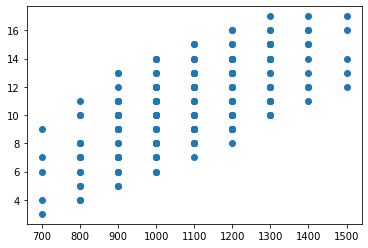

In [62]:
plt.scatter(X1,y)

In [63]:
y

0       3
1       4
2       6
3       7
4       9
       ..
190    12
191    13
192    14
193    16
194    17
Name: Time (Date), Length: 195, dtype: int64

In [64]:
X

,Bed Rooms,Bath Rooms,Living Rooms,Kitchen,Squre (Feet),Labors
0,1,1,1,1,700,6
1,1,1,1,1,700,5
2,1,1,1,1,700,4
3,1,1,1,1,700,3
4,1,1,1,1,700,2
...,...,...,...,...,...,...
190,4,2,1,1,1500,6
191,4,2,1,1,1500,5
192,4,2,1,1,1500,4
193,4,2,1,1,1500,3


In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size=0.25)

In [66]:
X_train.shape,X_test.shape

((146, 6), (49, 6))

In [67]:
def check_accOfModel(model):
    model.fit(X_train,y_train)
    acc = model.score(X_test,y_test)
    print(str(model)+'-->'+str(acc))

In [68]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
check_accOfModel(lr)

from sklearn.linear_model import Lasso
lsr =Lasso()
check_accOfModel(lsr)

from sklearn.tree import DecisionTreeRegressor
dtr =DecisionTreeRegressor()
check_accOfModel(dtr)

from sklearn.ensemble import RandomForestRegressor
rfr =RandomForestRegressor()
check_accOfModel(rfr)

LinearRegression()-->0.94439222359062
Lasso()-->0.8363772657570752
DecisionTreeRegressor()-->0.8823693613220187
RandomForestRegressor()-->0.9152542373827601


In [69]:
import pickle
with open('predictor.pickle','wb') as file:
    pickle.dump(lr,file)
    

In [70]:
lr.predict([[4,2,1,1,2520,0]])

E:\Softwares\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31.32030484])